In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


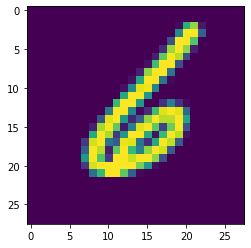

In [8]:
plt.imshow(X_train[999])

In [9]:
only_zeros = X_train[y_train==0]

In [10]:
only_zeros.shape

(5923, 28, 28)

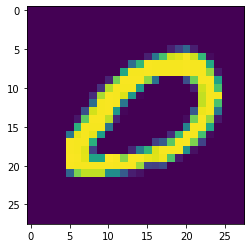

In [14]:
plt.imshow(only_zeros[936])

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [18]:
descriminator = Sequential()

descriminator.add(Flatten(input_shape=[28,28]))
descriminator.add(Dense(150, activation="relu"))
descriminator.add(Dense(100, activation="relu"))

descriminator.add(Dense(1, activation="sigmoid"))

descriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [19]:
codings_size = 100

generator = Sequential()

generator.add(Dense(100, activation="relu", input_shape=[codings_size]))
generator.add(Dense(150, activation="relu"))
generator.add(Dense(28*28, activation="relu"))
generator.add(Reshape([28,28]))

In [20]:
GAN = Sequential([generator, descriminator])

In [21]:
descriminator.trainable = False

In [22]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [23]:
batch_size = 32

In [25]:
my_data = only_zeros #X_train

In [26]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [29]:
dataset = dataset.batch(batch_size=batch_size, drop_remainder=True).prefetch(1)

In [28]:
epochs = 1

In [30]:
GAN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 28, 28)            143634    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 132951    
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [31]:
GAN.layers[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [38]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently in epoch {epoch+1}")
  i = 0

  for X_batch in dataset:
    i+=1
    if i%100 == 0:
      print(f"\tCurrently on batch {i} of {len(my_data)//batch_size}")

    #dicriminator
    noise = tf.random.normal(shape=[batch_size, codings_size])

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True

    discriminator.train_on_batch(X_fake_vs_real, y1)

    #generator
    noise = tf.random.normal(shape=[batch_size, codings_size])

    y2 = tf.constant([[1.0]]*batch_size)

    discriminator.trainable = False

    GAN.train_on_batch(noise,y2)

Currently in epoch 1
	Currently on batch 100 of 185


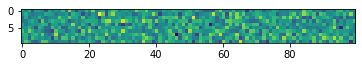

In [39]:
noise = tf.random.normal(shape=[10, codings_size])
plt.imshow(noise)

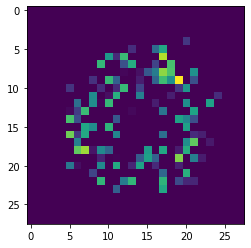

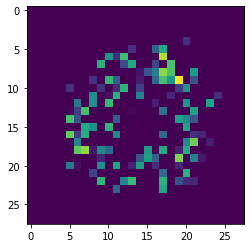

In [49]:
images = generator(noise)
plt.imshow(images[5])
plt.show()
plt.imshow(images[8])